## **CNN for photo recognition of skin cancer**







## For this project I will be building a convolutional neural network to try and determine whether a melanoma is malignant or benign. This is a problem that is very personal to me as my father was diagnosed with malignant melanoma years ago which almost took his life.

## The dataset can be found on kaggle at https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign

## Because I don't have a gpu I will be working on google colab. First step is to unzip the files. I put the file on my google drive for easy access. 

In [0]:
from zipfile import ZipFile
filename = '/content/drive/My Drive/skin-cancer-malignant-vs-benign.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')


Done


In [0]:
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

from PIL import Image

### The below section I will be defining my path for the training and test sets. I will then read those images into numpy arrays. I will subsequently label the two classes with zeros and ones. Lastly I will concatenate the two classes into their training and test sets respectively, then shuffle the data.

In [0]:
folder_benign_train = 'data/train/benign'
folder_malignant_train = 'data/train/malignant'

folder_benign_test = 'data/test/benign'
folder_malignant_test = 'data/test/malignant'

In [0]:
# read in jpegs as arrays
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [0]:
# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')

ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')

ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [0]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

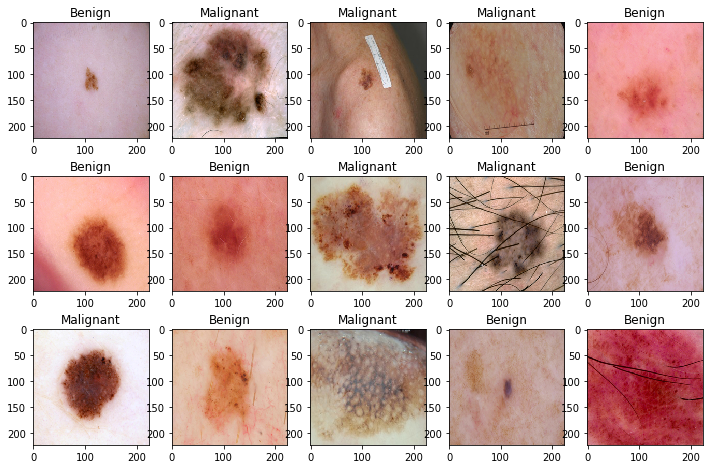

In [0]:
# Display first 15 images of moles, and how they are classified
w=50
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [0]:
print(X_train.shape, X_test.shape)

(2637, 224, 224, 3) (660, 224, 224, 3)


### Next step I will be creating a very simple CNN. One layer deep. These steps I learned through the keras and tensorflow specialization module in my Thinkful cirriculum.

In [0]:
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop
from keras.utils import to_categorical

# Import the backend
from keras import backend as K

# Convert to float32 for type consistency
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize values to 1 from 0 to 255 (256 values of pixels)
X_train = X_train / 255
X_test = X_test / 255

# Print sample sizes
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
# So instead of one column with 2 values, create 2 binary columns
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.


2637 train samples
660 test samples


### **Building my first CNN**

In [0]:
# Part 1 - Building the CNN
# I'll start off extremely simple

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fitting the first CNN and running it. I will start with 25 epochs.

In [0]:
history = classifier.fit(X_train, y_train,
                     batch_size=128,
                     epochs=25,
                     verbose=1,
                     validation_data=(X_test, y_test))
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Train on 2637 samples, validate on 660 samples
Epoch 1/25





2637/2637 [==============================] - 20s 8ms/step - loss: 6.7389 - acc: 0.5525 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 2/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.2765 - acc: 0.5461 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 3/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.2765 - acc: 0.5461 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 4/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.2765 - acc: 0.5461 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 5/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.2765 - acc: 0.5461 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 6/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.2765 - acc: 0.5461 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 7/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.2765 - acc: 0.5461 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 

### By the second epoch, there has been no change in loss or accuracy. With I test score of around 0.545 there is certainly room for improvement. I am going to work around this lack of information by adding information using the keras ImageDataGenerator.  

### **CNN with ImageDataGenerator**

### There is a lot more information generated when using this package. Therefore I will only be running five epochs to start. 

In [0]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 2637,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 660)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/5
2637/2637 [==============================] - 268s 102ms/step - loss: 0.3436 - acc: 0.8359 - val_loss: 0.3342 - val_acc: 0.8377
Epoch 2/5
2637/2637 [==============================] - 273s 103ms/step - loss: 0.2288 - acc: 0.8963 - val_loss: 0.3589 - val_acc: 0.8641
Epoch 3/5
2637/2637 [==============================] - 272s 103ms/step - loss: 0.1566 - acc: 0.9349 - val_loss: 0.4252 - val_acc: 0.8529
Epoch 4/5
2637/2637 [==============================] - 274s 104ms/step - loss: 0.0949 - acc: 0.9637 - val_loss: 0.8912 - val_acc: 0.8150
Epoch 5/5
2637/2637 [==============================] - 274s 104ms/step - loss: 0.0615 - acc: 0.9788 - val_loss: 0.5468 - val_acc: 0.8576


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


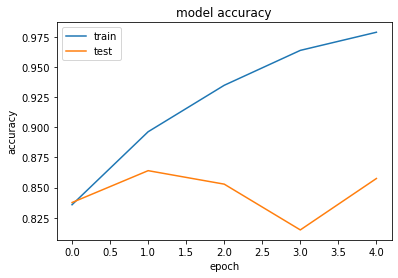

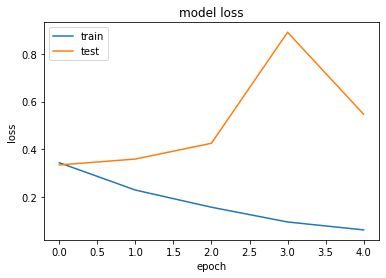

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### There seems to be some overfitting in my training set. Validation accuracy is relatively consistent though. I'm going to add one more convolutional layer to see if I can't boost the results.

In [0]:
# Building another CNN with a 2nd convolutional layer

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add Dropout
classifier.add(Dropout(0.2))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add Dropout
classifier.add(Dropout(0.2))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 2637,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 660)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/5
2637/2637 [==============================] - 276s 105ms/step - loss: 0.3367 - acc: 0.8373 - val_loss: 0.3324 - val_acc: 0.8425
Epoch 2/5
2637/2637 [==============================] - 275s 104ms/step - loss: 0.1992 - acc: 0.9126 - val_loss: 0.3838 - val_acc: 0.8324
Epoch 3/5
2637/2637 [==============================] - 275s 104ms/step - loss: 0.1108 - acc: 0.9554 - val_loss: 0.5233 - val_acc: 0.8482
Epoch 4/5
2637/2637 [==============================] - 275s 104ms/step - loss: 0.0692 - acc: 0.9741 - val_loss: 0.5619 - val_acc: 0.8515
Epoch 5/5
2637/2637 [==============================] - 275s 104ms/step - loss: 0.0481 - acc: 0.9826 - val_loss: 0.5646 - val_acc: 0.8668


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


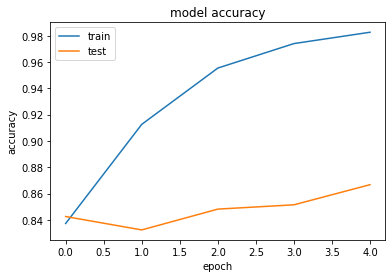

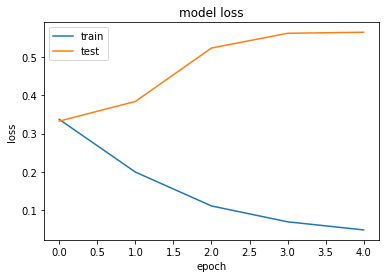

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### This model looks to perform marginally better, but after doing some research I've decided to use a pretrained model using fastai and torchvision. I will specifically be using resnet50.

## **CNN with resnet50**

In [0]:
from fastai.vision import *

import torchvision

In [0]:
# Define path
path = 'data'

# Label classes
classes = ['malignant','benign']

# Upload images
ImageList.from_folder(path)

ImageList (3297 items)
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
Path: data

In [0]:
# Using fastai's get_transform to increase available information
tfms = get_transforms(do_flip=True, flip_vert=True)

# Define how data will be split, labeled, transformed, bunched, and finally normalized.
data = (ImageList.from_folder(path)
        .split_by_folder('train', 'test')          
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch(bs=64)
        .normalize(imagenet_stats))

In [0]:
data


ImageDataBunch;

Train: LabelList (2637 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
benign,benign,benign,benign,benign
Path: data;

Valid: LabelList (660 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
benign,benign,benign,benign,benign
Path: data;

Test: None

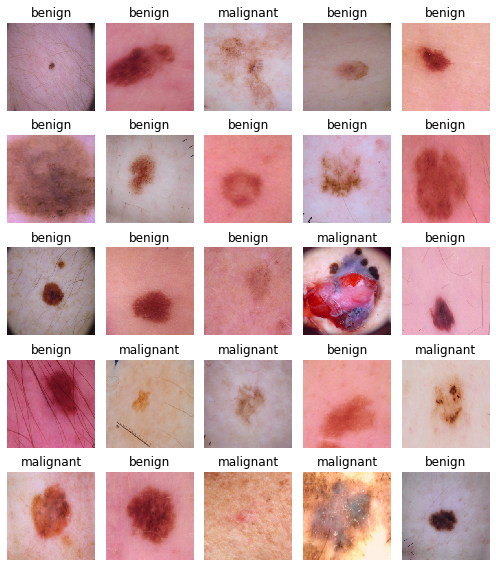

In [0]:
data.show_batch(rows=5, figsize=(7,8))

### It is time to use the pretrained resnet50 model to see how my performance is boosted

In [0]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=[error_rate, accuracy], 
                    model_dir = Path('data'),
                    path = Path("."), 
                    pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

### There are 2,161,026 trainable parameters. Those are only the BatchNorm params. I will fit it now and run 20 epochs.

In [0]:
# Fit model with 20 epochs
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.645831,0.601818,0.180303,0.819697,00:31
1,0.602381,0.434292,0.148485,0.851515,00:29
2,0.531837,0.435787,0.160606,0.839394,00:29
3,0.458571,0.372125,0.163636,0.836364,00:29
4,0.388896,0.343003,0.160606,0.839394,00:28
5,0.350088,0.328556,0.146970,0.853030,00:29
6,0.324981,0.311370,0.139394,0.860606,00:28
7,0.288409,0.287704,0.130303,0.869697,00:29
8,0.274636,0.273185,0.116667,0.883333,00:29
9,0.259290,0.265979,0.127273,0.872727,00:28


### Already there is a drastic improvement in performance. I have a pretty consistent decrease in loss on both training and test sets, error rate has also decreased consistently, and finally accuracy is over 0.90. I'm also happy with the speed. This model outperformed my traditional keras CNN in both speed and performance. That being said, there are some intersting tweaks that can be made with the fastai package starting with determing optimal learning rate.

In [0]:
# lr_find will determine at what learning rate we 
# have the lowest loss
learn.lr_find(start_lr=1e-9, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-08
Min loss divided by 10: 3.63E-06


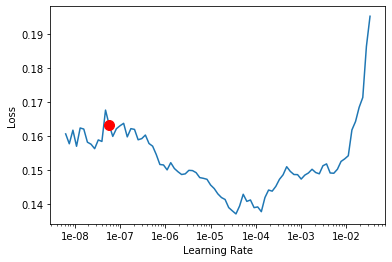

In [0]:
# Plot loss vs learning rate
learn.recorder.plot(suggestion=True)

In [0]:
# Save the model
learn.save('first')


### I want to check where the model is missing. Am I getting more false positives or negatives? I obviously would like to see more false positives. It never hurts to get a benign mole wrong, but the other way around can be extremely detrimental.

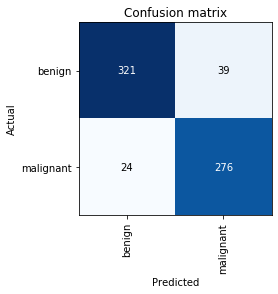

In [0]:
# Check confusion matrix 
learn.load('first');interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

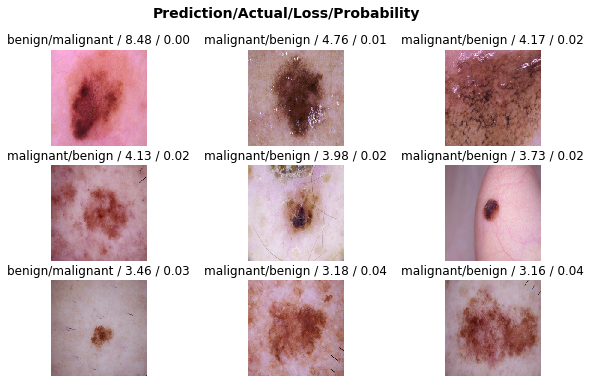

In [0]:
# Checking which photos are the furthest off
interp.plot_top_losses(9, figsize=(10,6))

### The first run was a success, but I think I can improve. Misclassification of malignant moles is at 8% and misclassification of benign is at just over 10.8%. Using the plot from above I will force a maximum learning rate to improve accuracy. 

In [0]:
# Load in and unfreeze model to work off of.
learn.load('first')
learn.unfreeze()

In [0]:
# Fit model a second time. 
# Learning rate is optimized and I'll run through 15 epochs.
learn.fit_one_cycle(15, max_lr=slice(1e-04,1e-06)) 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.150579,0.240242,0.096970,0.903030,00:38
1,0.153901,0.243844,0.101515,0.898485,00:36
2,0.150136,0.237066,0.101515,0.898485,00:37
3,0.152916,0.238216,0.090909,0.909091,00:36
4,0.148874,0.228728,0.096970,0.903030,00:36
5,0.141725,0.255353,0.101515,0.898485,00:36
6,0.133973,0.244441,0.104545,0.895455,00:37
7,0.130482,0.245431,0.092424,0.907576,00:36
8,0.124601,0.246541,0.090909,0.909091,00:36
9,0.121166,0.234442,0.086364,0.913636,00:36


In [0]:
# Saving the second model
learn.save('second')

In [0]:
# Check interpretation
learn.load('second');interp = ClassificationInterpretation.from_learner(learn)

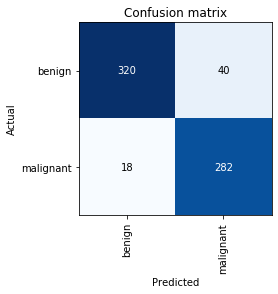

In [0]:
# Plot confusion matrix
interp.plot_confusion_matrix()

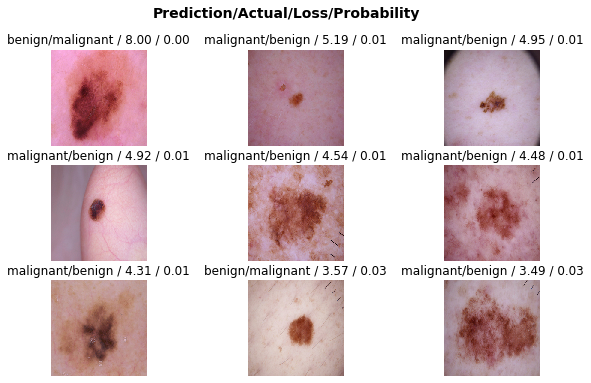

In [0]:
interp.plot_top_losses(9, figsize=(10,6))

### The improvements on this run are great. Though accuracy didn't increase substantially, the confusion matrix showed that it picked up accuracy where it counts. Malignant moles are being misclassified only 6% of the time and benign moles are being misclassified roughly 11% of the time.

## **Conclusions**

### This was a great exercise in application of deep learning. Though I think that there could be a larger set of pictures to help with the robustness of the dataset, the manipulation of the photos to increase complexity and information was a really good learning experience.

### I am really happy with the overall performance of the model. I tried a lot of different ways to boost performance and 90-91 percent efficacy was certainly the best performing. I was blown away by the amount of information there is out there to create really great deep learning models. We really are standing on the shoulders of giants.

### Let me be clear that there is no substitute for a medical professional when it comes to these matters, but there are over 27 million Americans without healthcare right now. And there are millions more that are underinsured. I think a service like this could be offered for free at great benefit to the general public. Maybe cases like my father can be avoided here in the near future.

In [0]:
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

from PIL import Image

In [2]:
from zipfile import ZipFile
filename = '/content/drive/My Drive/fruits.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')
  

Done


In [3]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Adding Dropout
classifier.add(Dropout(0.20))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

# 120 classes requires Dense of 120
classifier.add(Dense(units = 120, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_folders = 'fruits-360_dataset/fruits-360/Training'
test_folders = 'fruits-360_dataset/fruits-360/Test'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_folders,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_folders,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000)

Found 60498 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





8000/8000 [==============================] - 474s 59ms/step - loss: 0.2000 - acc: 0.9435 - val_loss: 0.1906 - val_acc: 0.9426
Epoch 2/5
8000/8000 [==============================] - 462s 58ms/step - loss: 0.0364 - acc: 0.9896 - val_loss: 0.1939 - val_acc: 0.9469
Epoch 3/5
8000/8000 [==============================] - 459s 57ms/step - loss: 0.0263 - acc: 0.9928 - val_loss: 0.1306 - val_acc: 0.9677
Epoch 4/5
8000/8000 [==============================] - 458s 57ms/step - loss: 0.0222 - acc: 0.9944 - val_loss: 0.1381 - val_acc: 0.9686
Epoch 5/5
8000/8000 [==============================] - 467s 58ms/step - loss: 0.0234 - acc: 0.9949 - val_loss: 0.0777 - val_acc: 0.9813


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


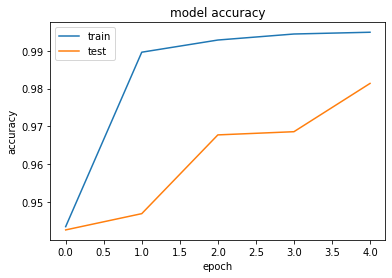

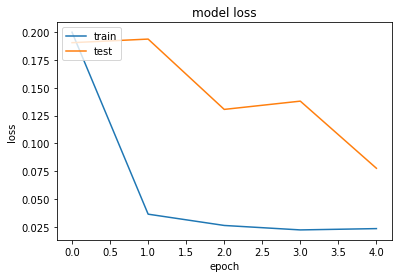

In [5]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from fastai.vision import *

import torchvision

In [0]:
# Using fastai's get_transform to increase available information
tfms = get_transforms(do_flip=True, flip_vert=True)

# Define how data will be split, labeled, transformed, bunched, and finally normalized.
data = (ImageList.from_folder(path)
        .split_by_folder('Training', 'Test')          
        .label_from_folder()
        .transform(tfms, size=100)
        .databunch(bs=64)
        .normalize(imagenet_stats))

In [6]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=[error_rate, accuracy], 
                    model_dir = Path('fruits-360'),
                    path = Path("."), 
                    pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [7]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 50, 50]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 50, 50]         128        True      
______________________________________________________________________
ReLU                 [64, 50, 50]         0          False     
______________________________________________________________________
MaxPool2d            [64, 25, 25]         0          False     
______________________________________________________________________
Conv2d               [64, 25, 25]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 25, 25]         128        True      
______________________________________________________________________
Conv2d               [64, 25, 25]         36,864     False     
___________________________________________________

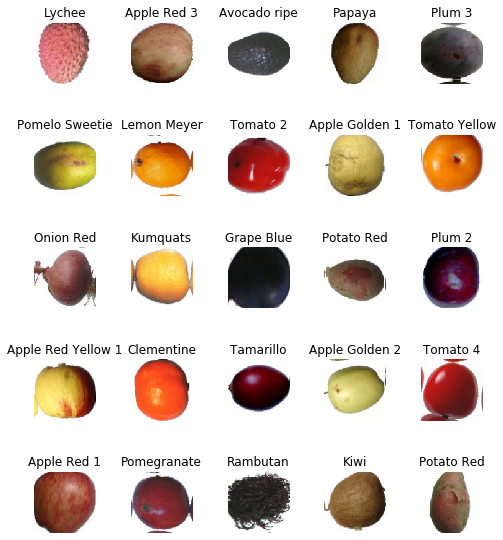

In [8]:
data.show_batch(rows=5, figsize=(7,8))

In [9]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.142089,0.110273,0.036951,0.963049,03:42
1,0.077845,0.061713,0.020076,0.979924,03:35
2,0.024425,0.052272,0.014402,0.985598,03:36
3,0.012607,0.015181,0.004995,0.995005,03:35
4,0.007581,0.018662,0.005140,0.994860,03:37


In [10]:
learn.save('fruit')
# Check interpretation
learn.load('fruit');interp = ClassificationInterpretation.from_learner(learn)


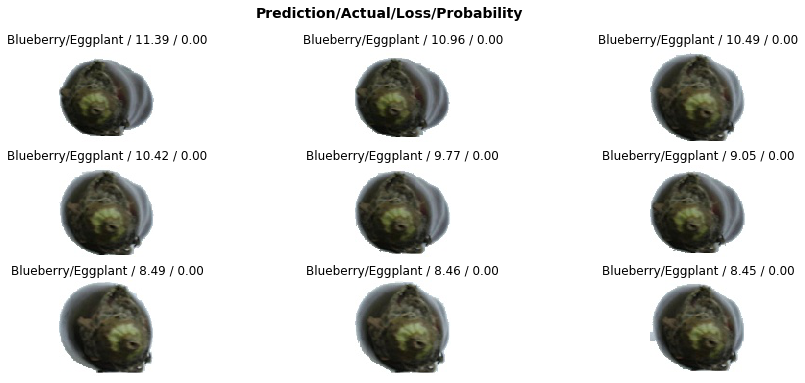

In [11]:
interp.plot_top_losses(9, figsize=(15,6))